In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [2]:
# Define algumas variáveis
pasta_datasets = '../Datasets/'
arquivo_combustiveis_dolar_ipca_nacional = 'df_combustiveis_dolar_ipca_nacional.csv'

In [3]:
# Efetua a leitura do arquivo 'combustiveis_dolar_ipca_nacional.csv' 

print(pasta_datasets+arquivo_combustiveis_dolar_ipca_nacional)
df_combustiveis_dolar_ipca_nacional  =  pd.read_csv(pasta_datasets+arquivo_combustiveis_dolar_ipca_nacional,sep = ';',low_memory=False, parse_dates=['Data'],dayfirst = True,encoding='utf-8')

# Cria um novo índice com a coluna 'Data' 
df_combustiveis_dolar_ipca_nacional.set_index(['Data'], inplace=True)

display(df_combustiveis_dolar_ipca_nacional)
df_combustiveis_dolar_ipca_nacional.info()


../Datasets/df_combustiveis_dolar_ipca_nacional.csv


,ValorVendaGasolina,ValorVendaEtanol,CotacaoDolarVenda,Indice_Dez93,Ipca_Mensal
Data,,,,,
2005-01-03,2.411366,1.750419,2.6682,2412.83,0.58
2005-01-04,2.406277,1.719137,2.6887,2412.83,0.58
2005-01-05,2.389795,1.740931,2.7096,2412.83,0.58
2005-01-06,2.424676,1.704239,2.7207,2412.83,0.58
2005-01-10,2.414220,1.744700,2.6973,2412.83,0.58
...,...,...,...,...,...
2021-12-27,6.668185,5.580209,5.6650,6120.04,0.73
2021-12-28,6.692192,5.629191,5.6438,6120.04,0.73
2021-12-29,6.726590,5.624709,5.6619,6120.04,0.73


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3511 entries, 2005-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ValorVendaGasolina  3511 non-null   float64
 1   ValorVendaEtanol    3511 non-null   float64
 2   CotacaoDolarVenda   3511 non-null   float64
 3   Indice_Dez93        3511 non-null   float64
 4   Ipca_Mensal         3511 non-null   float64
dtypes: float64(5)
memory usage: 164.6 KB


In [4]:
# Vamos realizar a previsão dos últimos 04 anos (2018 a 2021) comparando com o valor real

train = df_combustiveis_dolar_ipca_nacional['2005-01-03':'2017-12-31']
test = df_combustiveis_dolar_ipca_nacional['2018-01-01':'2021-12-31']

In [5]:
# Definição de parâmetros para os gráficos

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (18, 13)
plt.rcParams['lines.linewidth'] = 1

In [6]:
# GASOLINA

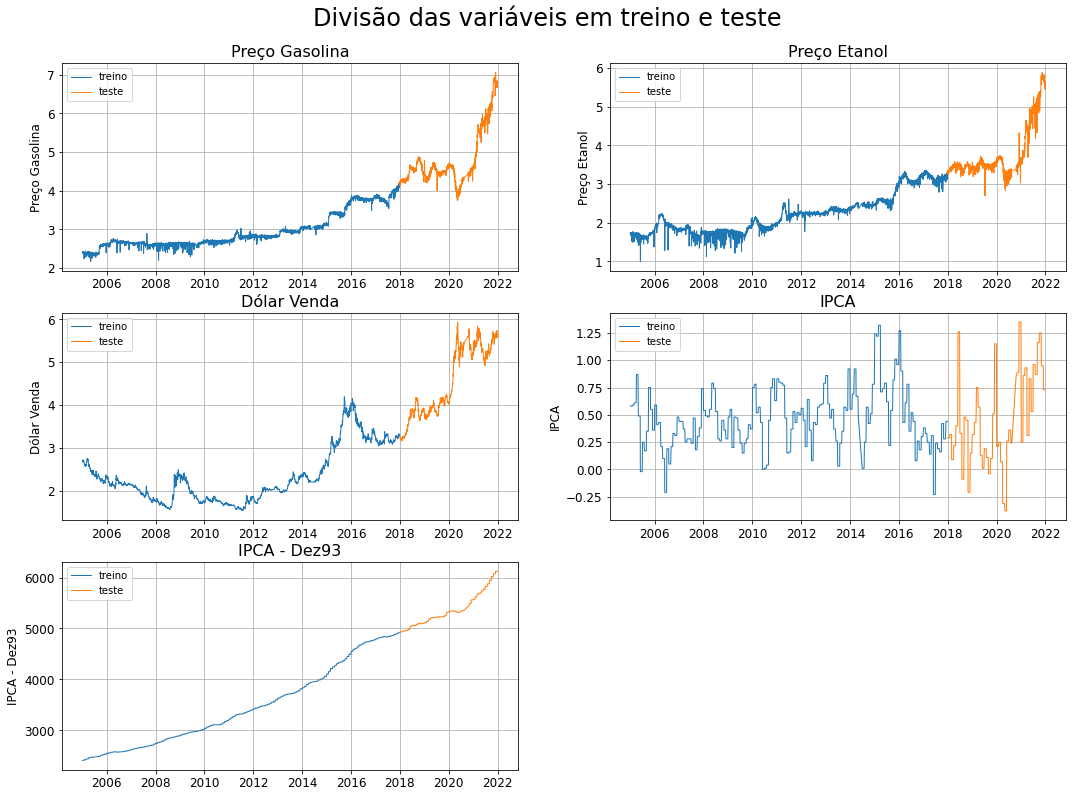

In [7]:
plt.rcParams['figure.figsize'] = (18, 13)

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Divisão das variáveis em treino e teste', fontsize=24, y=0.94)

ax6.axis('off')

ax1.plot(train['ValorVendaGasolina'], label='treino')
ax1.plot(test['ValorVendaGasolina'], label='teste')
ax2.plot(train['ValorVendaEtanol'], label='treino')
ax2.plot(test['ValorVendaEtanol'], label='teste')
ax3.plot(train['CotacaoDolarVenda'], label='treino')
ax3.plot(test['CotacaoDolarVenda'], label='teste')
ax4.plot(train['Ipca_Mensal'], label='treino')
ax4.plot(test['Ipca_Mensal'], label='teste')
ax5.plot(train['Indice_Dez93'], label='treino')
ax5.plot(test['Indice_Dez93'], label='teste')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

ax1.set_ylabel('Preço Gasolina')
ax2.set_ylabel('Preço Etanol')
ax3.set_ylabel('Dólar Venda')
ax4.set_ylabel('IPCA')
ax5.set_ylabel('IPCA - Dez93')

ax1.set_title('Preço Gasolina')
ax2.set_title('Preço Etanol')
ax3.set_title('Dólar Venda')
ax4.set_title('IPCA')
ax5.set_title('IPCA - Dez93')

ax1.grid(True, axis='both')
ax2.grid(True, axis='both')
ax3.grid(True, axis='both')
ax4.grid(True, axis='both')
ax5.grid(True, axis='both')



In [8]:
# Variações possíveis entre as variáveis exógenas
exogenas = ('univariado', 
            ['CotacaoDolarVenda'], 
            ['Ipca_Mensal'], 
            ['Indice_Dez93'],
            ['Ipca_Mensal', 'Indice_Dez93'], 
            ['Ipca_Mensal', 'CotacaoDolarVenda'], 
            ['Indice_Dez93', 'CotacaoDolarVenda'], 
            ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda'])


In [9]:
# Gera os modelos com a diversas combinações de variáveis para Gasolina
modelos_gasolina = []
trace = False
random_state = 77 # Para permitir reproducibilidade


for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        modelos_gasolina.append(auto_arima(train['ValorVendaGasolina'],
                               seasonal=False, stepwise=True,
                               trace=trace, supress_warnings=True, error_action='ignore', random_state=random_state))
    else:
        print(f'Modelo multivariado: {exogena}')
        modelos_gasolina.append(auto_arima(train['ValorVendaGasolina'], exogenous=train[exogena],
                               seasonal=False, stepwise=True,
                               trace=trace, supress_warnings=True, error_action='ignore', random_state=random_state))



Modelo univariado
Modelo multivariado: ['CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal']
Modelo multivariado: ['Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'CotacaoDolarVenda']
Modelo multivariado: ['Indice_Dez93', 'CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda']


In [10]:
# Armazena o AIC e a ordens de cada modelo
aic = []
order = []

for model in modelos_gasolina:
    aic.append(f'{model.aic():.2f}')  
    if model.fit_with_exog_:
        order.append(f'SARIMAX{model.order}{model.seasonal_order}')
    else:
        order.append(f'SARIMA{model.order}{model.seasonal_order}')

In [11]:
#Gera as previsões na mesma quantidade de períodos do "test" para Gasolina
previsoes_gasolina = []
periodos = len(test)
index_col = test.index
indice = 0

for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        previsoes_gasolina.append(pd.DataFrame(modelos_gasolina[indice].predict(n_periods=periodos), 
                                      index=index_col, columns=['previsao']))
    else:
        print(f'Modelo multivariado: {exogena}')
        previsoes_gasolina.append(pd.DataFrame(modelos_gasolina[indice].predict(n_periods=periodos, exogenous=test[exogena]), 
                                      index=index_col, columns=['previsao']))
    indice += 1

Modelo univariado
Modelo multivariado: ['CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal']
Modelo multivariado: ['Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'CotacaoDolarVenda']
Modelo multivariado: ['Indice_Dez93', 'CotacaoDolarVenda']


C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No sup

Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda']


C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [12]:
# Cálculo MAPE, RMSE e R2 para Gasolina
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

rmse = []
r2 = []
r2_ajustado = []
mape = []

i=0
for previsao in previsoes_gasolina:
    # Calcula o erro RMSE
    rmse.append(np.sqrt(mean_squared_error(test['ValorVendaGasolina'], previsao)))

    # Cálculo do coeficiente de determinação, também chamado de R²
    r2.append(r2_score(test['ValorVendaGasolina'], previsao))
    
    # Cálculo R² Ajustado
    n = len(train)
    k = len(exogenas[i]) # exemplo: 3 -> combustivel, dólar e IPCA
    r2_ajustado.append(1 - (1-r2[-1])*(n-1)/(n-k-1))

    # Mean absolute percentage error (MAPE) - a measure of prediction accuracy of a forecasting method in statistics
    mape.append(mean_absolute_percentage_error(test['ValorVendaGasolina'], previsao) * 100)
    
    i+=1

In [13]:
# Agrega todos os modelos referentes à Gasolina
df_modelos_gasolina = pd.DataFrame(list(zip(exogenas, order, aic, rmse, r2, r2_ajustado, mape, previsoes_gasolina, modelos_gasolina)), 
             columns=['Variáveis','Ordem do Modelo', 'AIC do Modelo', 'RMSE', 'R2', 'R2 Ajustado', 'MAPE (%)', 'Previsões', 'Modelo pmdarima' ])
df_modelos_gasolina

,Variáveis,Ordem do Modelo,AIC do Modelo,RMSE,R2,R2 Ajustado,MAPE (%),Previsões,Modelo pmdarima
0,univariado,"SARIMA(3, 1, 1)(0, 0, 0, 0)",-8983.87,0.786880,-0.073301,-0.077319,9.405670,previsao Data 2018...,"ARIMA(3,1,1)(0,0,0)[0] intercept"
1,[CotacaoDolarVenda],"SARIMAX(3, 1, 1)(0, 0, 0, 0)",-8987.10,0.747397,0.031706,0.031344,9.003052,previsao Data 2018...,"ARIMA(3,1,1)(0,0,0)[0] intercept"
2,[Ipca_Mensal],"SARIMAX(3, 1, 1)(0, 0, 0, 0)",-8983.41,0.785418,-0.069316,-0.069715,9.407415,previsao Data 2018...,"ARIMA(3,1,1)(0,0,0)[0] intercept"
3,[Indice_Dez93],"SARIMAX(5, 1, 2)(0, 0, 0, 0)",-9005.79,0.733338,0.067793,0.067445,9.016172,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"
4,"[Ipca_Mensal, Indice_Dez93]","SARIMAX(5, 1, 2)(0, 0, 0, 0)",-9003.96,0.736884,0.058754,0.058052,9.067023,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"
5,"[Ipca_Mensal, CotacaoDolarVenda]","SARIMAX(3, 1, 1)(0, 0, 0, 0)",-8986.41,0.736706,0.059210,0.058508,8.901187,previsao Data 2018...,"ARIMA(3,1,1)(0,0,0)[0] intercept"
6,"[Indice_Dez93, CotacaoDolarVenda]","SARIMAX(2, 1, 4)(0, 0, 0, 0)",-9018.38,0.693544,0.166218,0.165595,8.580777,previsao Data 2018...,"ARIMA(2,1,4)(0,0,0)[0]"
7,"[Ipca_Mensal, Indice_Dez93, CotacaoDolarVenda]","SARIMAX(5, 1, 2)(0, 0, 0, 0)",-9006.81,0.692577,0.168542,0.167610,8.587493,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"


In [14]:
# Melhores modelos referentes à Gasolina
index_uni = 0
index_mul = 7

#Modelos
model_uni = df_modelos_gasolina.loc[index_uni]['Modelo pmdarima']
model_mul = df_modelos_gasolina.loc[index_mul]['Modelo pmdarima']

#Resíduos
residuos_uni = model_uni.resid()
residuos_mul = model_mul.resid()

# Previsões
previsao_uni = df_modelos_gasolina.loc[index_uni]['Previsões']
previsao_mul = df_modelos_gasolina.loc[index_mul]['Previsões']

In [15]:
print(model_uni.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2682
Model:               SARIMAX(3, 1, 1)   Log Likelihood                4497.935
Date:                Wed, 25 May 2022   AIC                          -8983.870
Time:                        02:20:43   BIC                          -8948.506
Sample:                             0   HQIC                         -8971.077
                               - 2682                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.000      2.537      0.011       0.000       0.002
ar.L1         -0.2563      0.029     -8.859      0.000      -0.313      -0.200
ar.L2         -0.2840      0.025    -11.447      0.0

In [16]:
print(model_mul.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2682
Model:               SARIMAX(5, 1, 2)   Log Likelihood                4514.405
Date:                Wed, 25 May 2022   AIC                          -9006.810
Time:                        02:20:43   BIC                          -8941.977
Sample:                             0   HQIC                         -8983.356
                               - 2682                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Ipca_Mensal           0.0035      0.011      0.312      0.755      -0.018       0.025
Indice_Dez93          0.0006      0.000      5.646      0.000       0.000       0.001
CotacaoDolarVenda     0.

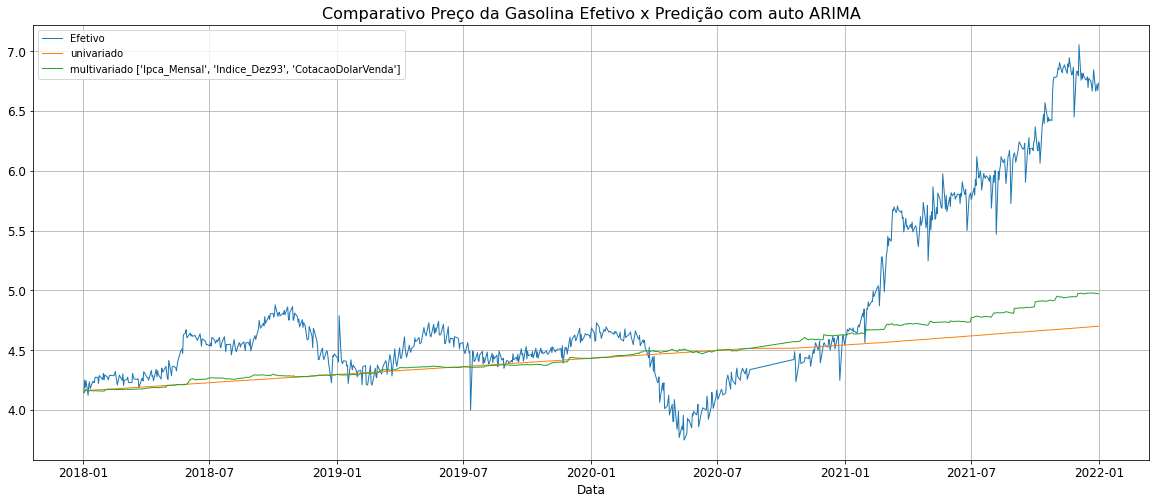

In [17]:
plt.figure(figsize = (20,8))
plt.title('Comparativo Preço da Gasolina Efetivo x Predição com auto ARIMA')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.plot(previsao_mul, label = f"multivariado {df_modelos_gasolina['Variáveis'][index_mul]}")
plt.grid(True, axis='both')
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()



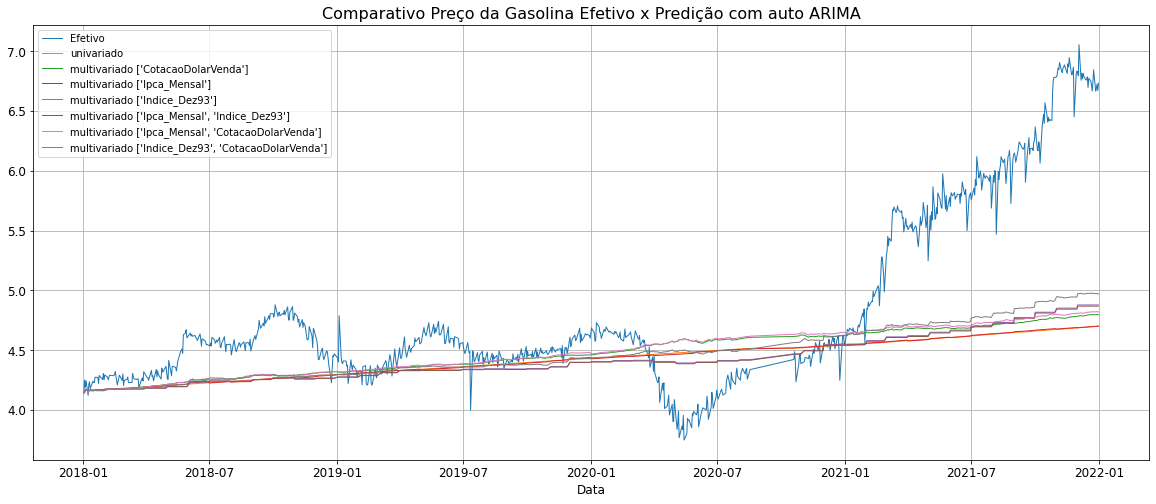

In [18]:
plt.figure(figsize = (20,8))
plt.title('Comparativo Preço da Gasolina Efetivo x Predição com auto ARIMA')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.grid(True, axis='both')

for i in range (1,7):
    plt.plot(df_modelos_gasolina.loc[i]['Previsões'], label = f"multivariado {df_modelos_gasolina['Variáveis'][i]}")
    
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()

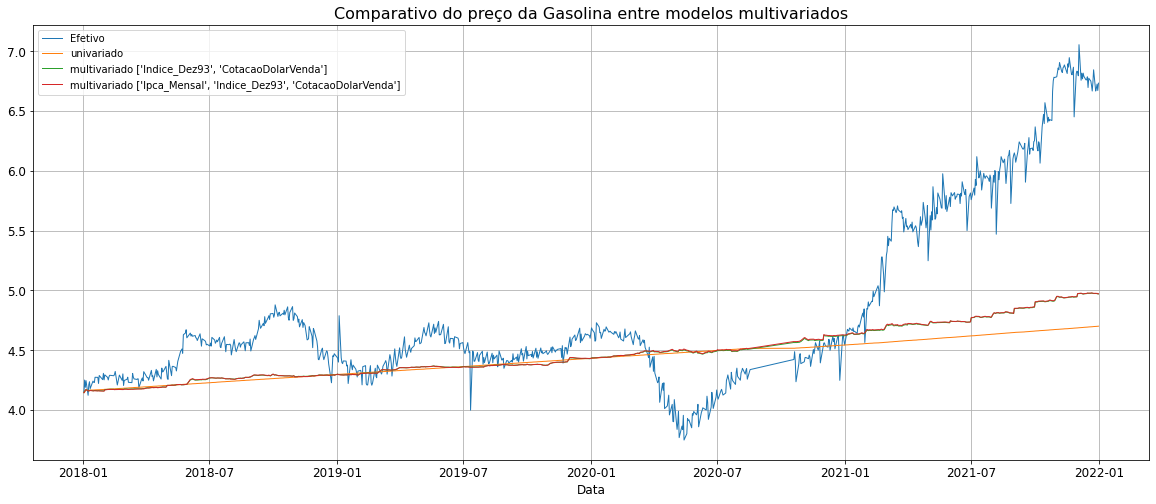

In [19]:
# Gráfico comparando os modelos multivariados ['Indice_Dez93', 'CotacaoDolarVenda'] e ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda']

# EM TAMANHO MENOR 

plt.figure(figsize = (20,8))
plt.title('Comparativo do preço da Gasolina entre modelos multivariados')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.grid(True, axis='both')

plt.plot(df_modelos_gasolina.loc[6]['Previsões'], label = f"multivariado {df_modelos_gasolina['Variáveis'][6]}")
plt.plot(df_modelos_gasolina.loc[7]['Previsões'], label = f"multivariado {df_modelos_gasolina['Variáveis'][7]}")
    
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()

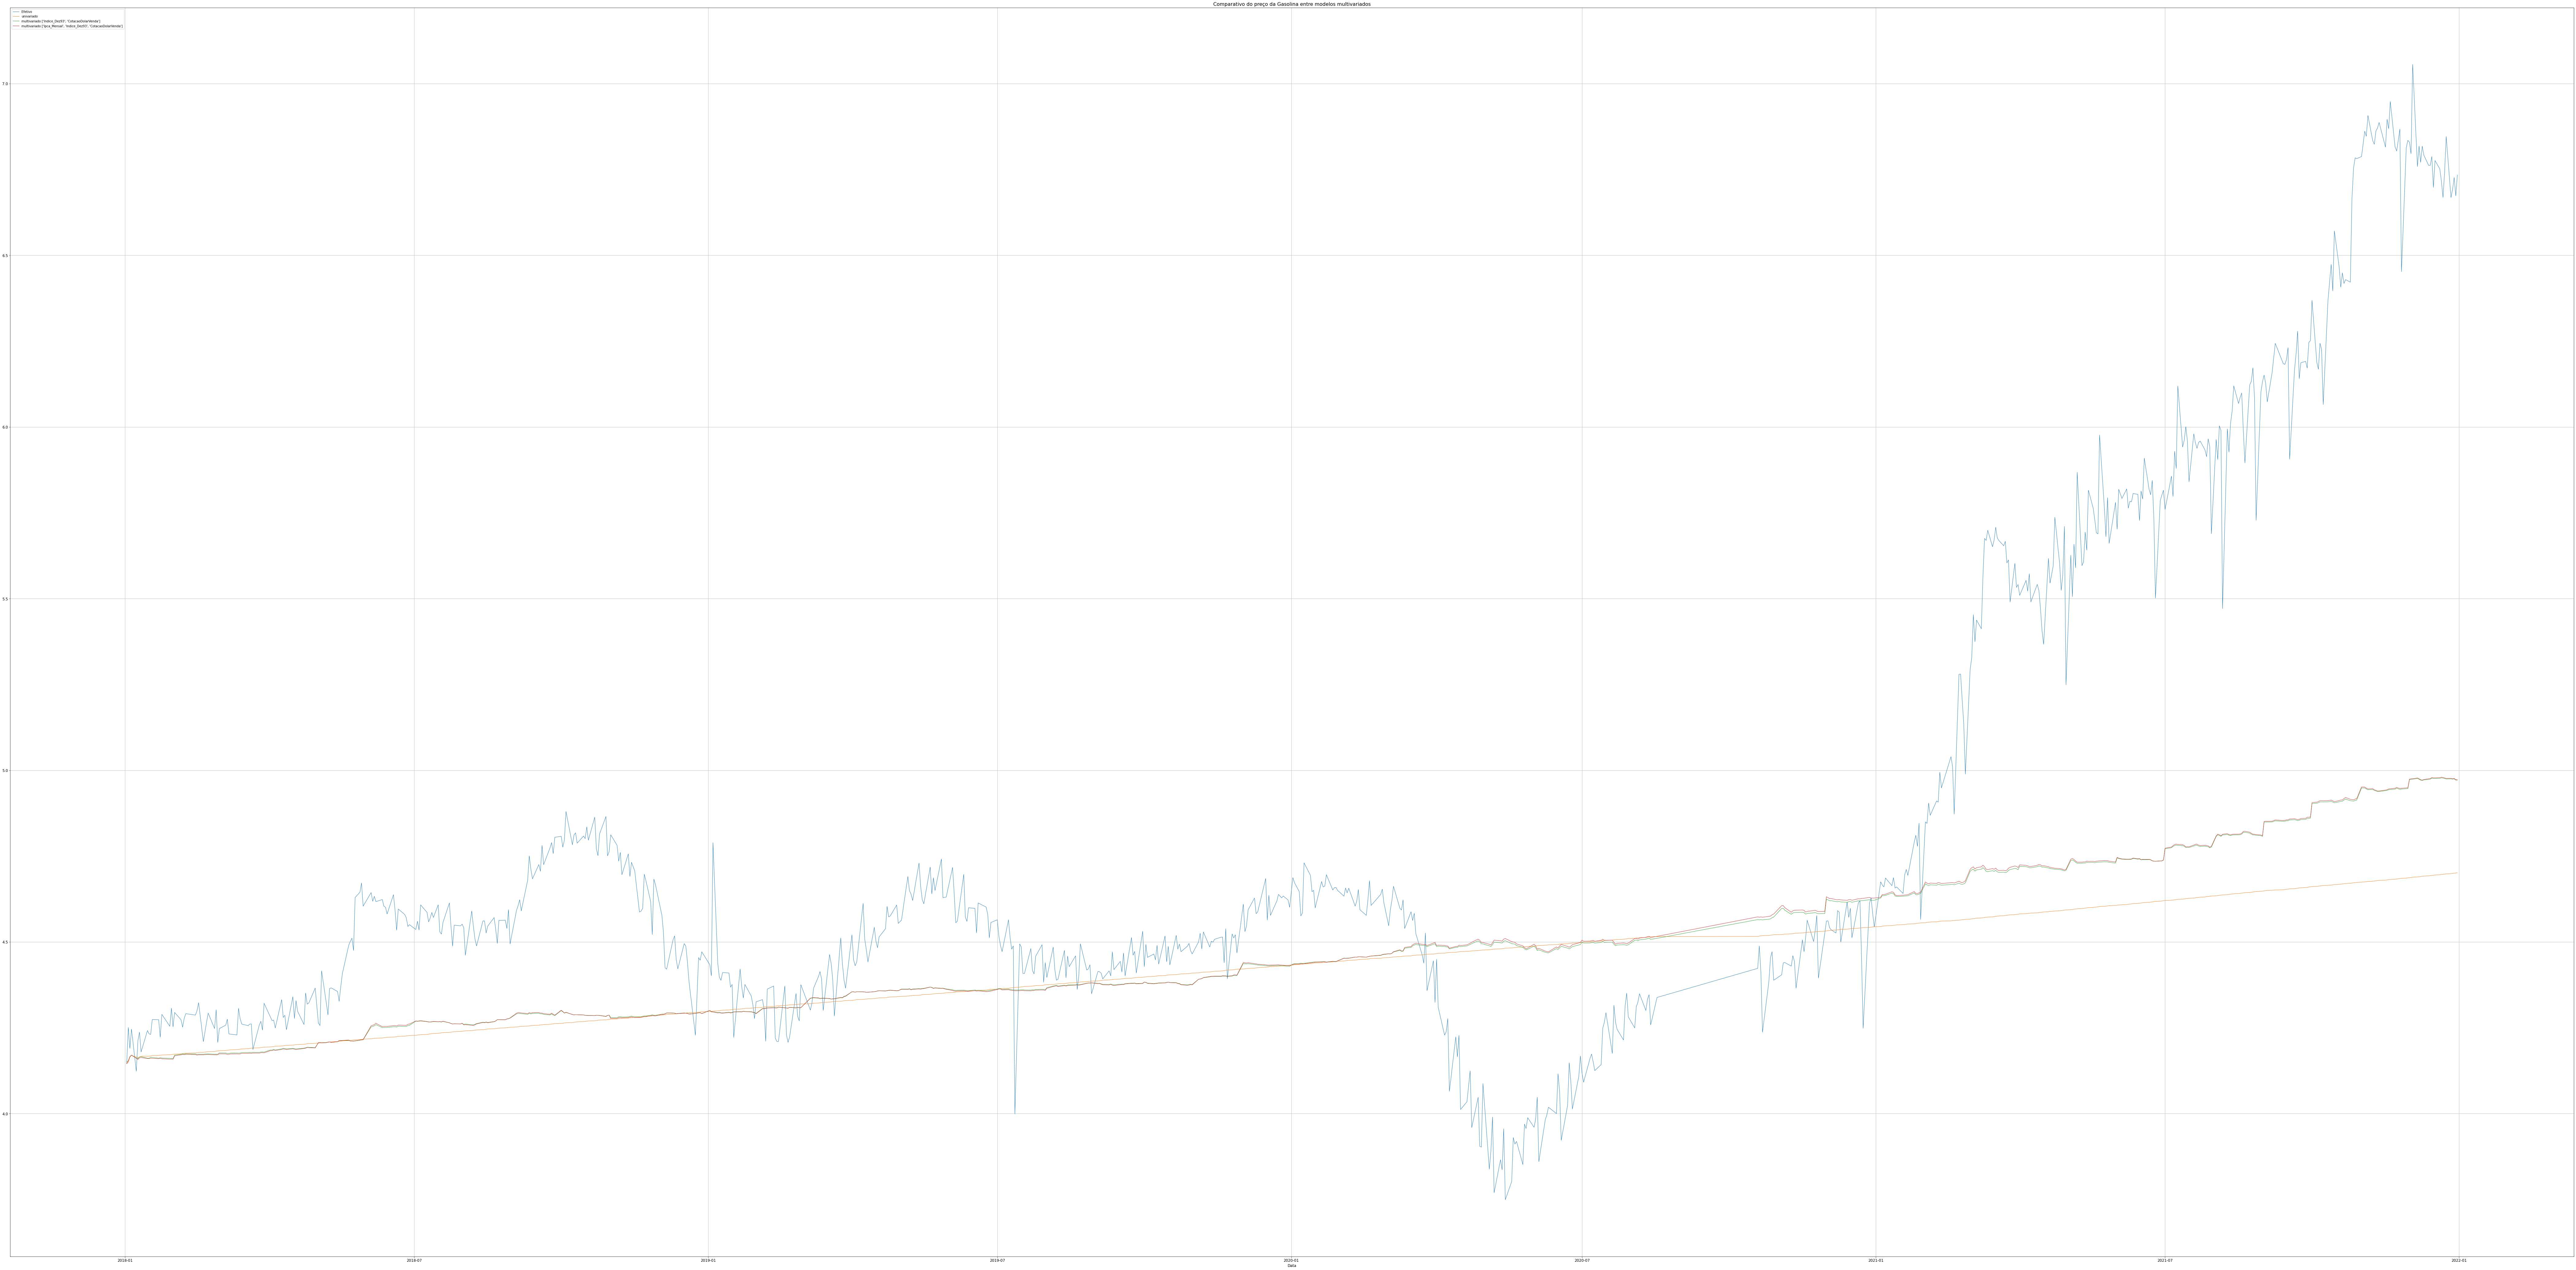

In [20]:
# Como as linhas aparentemente são coincidentes, foi feita uma plotagem em tamanho maior para melhor visualização

plt.figure(figsize = (150,75))
plt.title('Comparativo do preço da Gasolina entre modelos multivariados')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.grid(True, axis='both')

plt.plot(df_modelos_gasolina.loc[6]['Previsões'], label = f"multivariado {df_modelos_gasolina['Variáveis'][6]}")
plt.plot(df_modelos_gasolina.loc[7]['Previsões'], label = f"multivariado {df_modelos_gasolina['Variáveis'][7]}")
    
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()

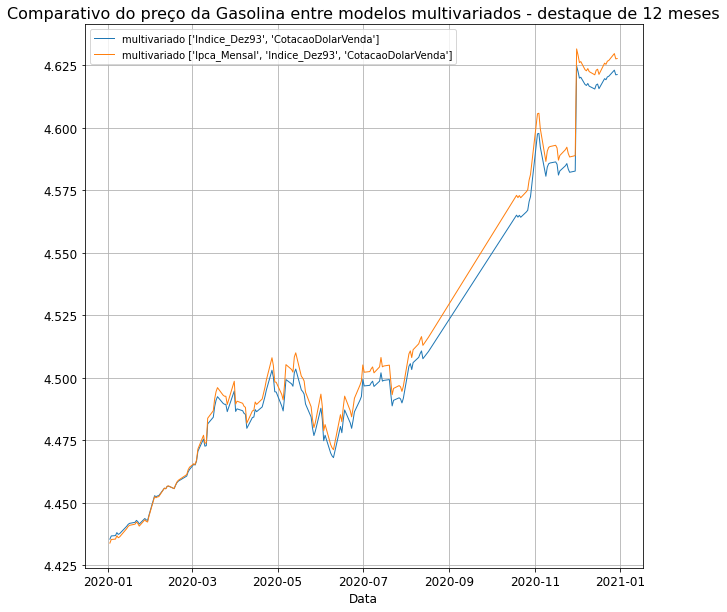

In [21]:
# Foi feita a plotagem de um destaque de 12 meses:

plt.figure(figsize = (10,10))
plt.title('Comparativo do preço da Gasolina entre modelos multivariados - destaque de 12 meses')
plt.grid(True, axis='both')

plt.plot(df_modelos_gasolina.loc[6]['Previsões']['2020-01-02':'2020-12-30'], label = f"multivariado {df_modelos_gasolina['Variáveis'][6]}")
plt.plot(df_modelos_gasolina.loc[7]['Previsões']['2020-01-02':'2020-12-30'], label = f"multivariado {df_modelos_gasolina['Variáveis'][7]}")
    
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()

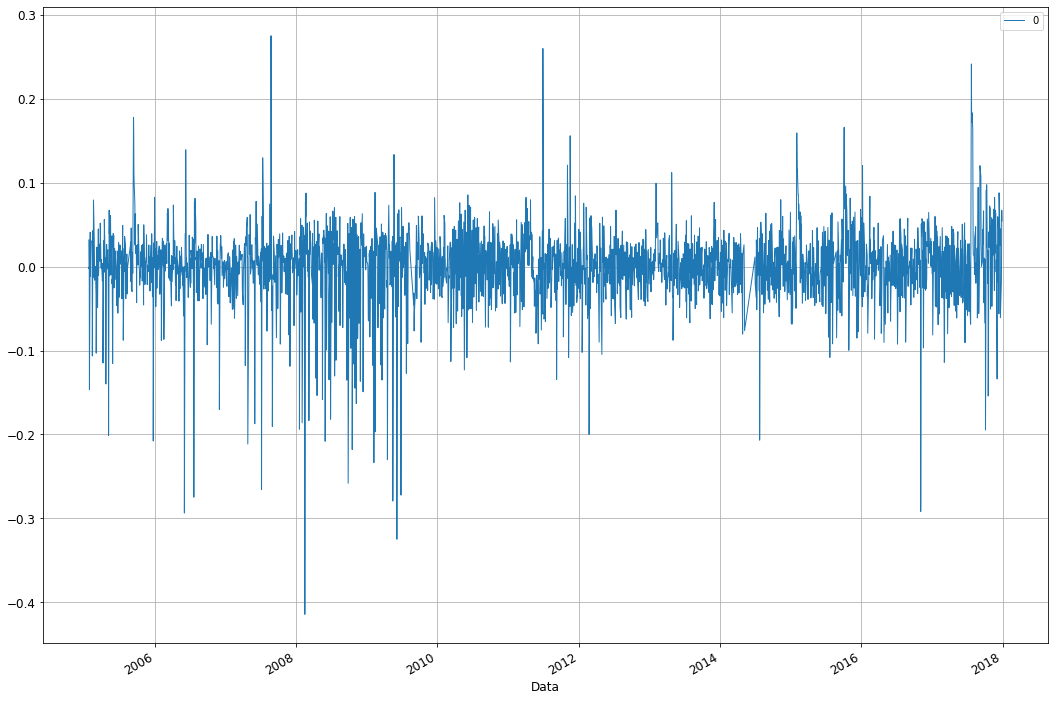

In [22]:
#Plotagem dos resíduos(diferença entre)
residuals = pd.DataFrame(model_mul.resid())[12:]
residuals.plot()
plt.grid(True, axis='both')
plt.show()


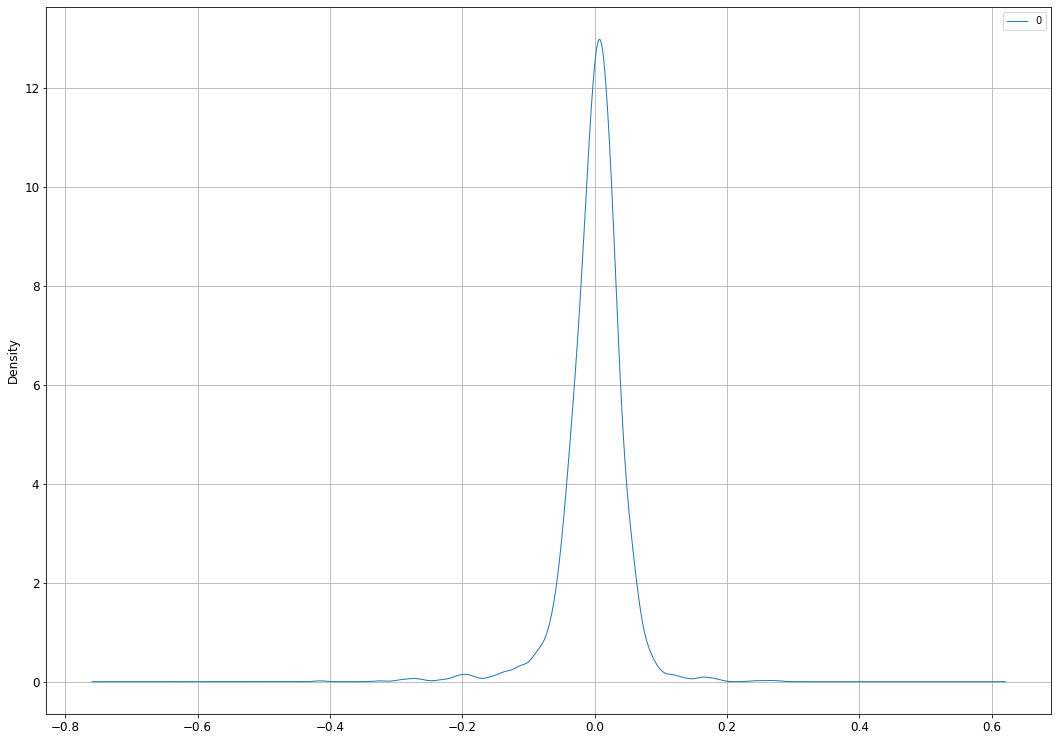

                 0
count  2670.000000
mean      0.000424
std       0.044996
min      -0.414399
25%      -0.017846
50%       0.004161
75%       0.023735
max       0.275291


In [23]:
#Plotagem da densidade dos resíduos(erros residuais)
residuals.plot(kind='kde')
plt.grid(True, axis='both')
plt.show()
print(residuals.describe())

In [24]:
# ETANOL

In [25]:
# Gera os modelos com a diversas combinações de variáveis para Etanol
modelos_etanol = []
trace = False
random_state = 77 # Para permitir reproducibilidade


for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        modelos_etanol.append(auto_arima(train['ValorVendaEtanol'],
                               seasonal=False, stepwise=True,
                               trace=trace, supress_warnings=True, error_action='ignore', random_state=random_state))
    else:
        print(f'Modelo multivariado: {exogena}')
        modelos_etanol.append(auto_arima(train['ValorVendaEtanol'], exogenous=train[exogena],
                               seasonal=False, stepwise=True,
                               trace=trace, supress_warnings=True, error_action='ignore', random_state=random_state))



Modelo univariado
Modelo multivariado: ['CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal']
Modelo multivariado: ['Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'CotacaoDolarVenda']
Modelo multivariado: ['Indice_Dez93', 'CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda']


In [26]:
# Armazena o AIC e a ordens de cada modelo
aic = []
order = []

for model in modelos_etanol:
    aic.append(f'{model.aic():.2f}')  
    if model.fit_with_exog_:
        order.append(f'SARIMAX{model.order}{model.seasonal_order}')
    else:
        order.append(f'SARIMA{model.order}{model.seasonal_order}')

In [27]:
#Gera as previsões na mesma quantidade de períodos do "test" para Etanol
previsoes_etanol = []
periodos = len(test)
index_col = test.index
indice = 0

for exogena in exogenas:
    if exogena == 'univariado':
        print(f'Modelo univariado')
        previsoes_etanol.append(pd.DataFrame(modelos_etanol[indice].predict(n_periods=periodos), 
                                      index=index_col, columns=['previsao']))
    else:
        print(f'Modelo multivariado: {exogena}')
        previsoes_etanol.append(pd.DataFrame(modelos_etanol[indice].predict(n_periods=periodos, exogenous=test[exogena]), 
                                      index=index_col, columns=['previsao']))
    indice += 1

Modelo univariado
Modelo multivariado: ['CotacaoDolarVenda']
Modelo multivariado: ['Ipca_Mensal']
Modelo multivariado: ['Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93']
Modelo multivariado: ['Ipca_Mensal', 'CotacaoDolarVenda']
Modelo multivariado: ['Indice_Dez93', 'CotacaoDolarVenda']


C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No sup

Modelo multivariado: ['Ipca_Mensal', 'Indice_Dez93', 'CotacaoDolarVenda']


C:\Users\vinic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [28]:
# Cálculo MAPE, RMSE e R2 para Etanol
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

rmse = []
r2 = []
r2_ajustado = []
mape = []

i=0
for previsao in previsoes_etanol:
    # Calcula o erro RMSE
    rmse.append(np.sqrt(mean_squared_error(test['ValorVendaEtanol'], previsao)))

    # Cálculo do coeficiente de determinação, também chamado de R²
    r2.append(r2_score(test['ValorVendaEtanol'], previsao))
    
    # Cálculo R² Ajustado
    n = len(train)
    k = len(exogenas[i]) # exemplo: 3 -> combustivel, dolar e IPCA
    r2_ajustado.append(1 - (1-r2[-1])*(n-1)/(n-k-1))

    # Mean absolute percentage error (MAPE) - a measure of prediction accuracy of a forecasting method in statistics
    mape.append(mean_absolute_percentage_error(test['ValorVendaEtanol'], previsao) * 100)
    
    i+=1

In [29]:
# Agrega todos os modelos referentes ao Etanol
df_modelos_etanol = pd.DataFrame(list(zip(exogenas, order, aic, rmse, r2, r2_ajustado, mape, previsoes_etanol, modelos_etanol)), 
             columns=['Variáveis','Ordem do Modelo', 'AIC do Modelo', 'RMSE', 'R2', 'R2 Ajustado', 'MAPE (%)', 'Previsões', 'Modelo pmdarima' ])
df_modelos_etanol

,Variáveis,Ordem do Modelo,AIC do Modelo,RMSE,R2,R2 Ajustado,MAPE (%),Previsões,Modelo pmdarima
0,univariado,"SARIMA(4, 1, 3)(0, 0, 0, 0)",-6536.98,0.953342,-0.701499,-0.707869,13.683562,previsao Data 2018...,"ARIMA(4,1,3)(0,0,0)[0]"
1,[CotacaoDolarVenda],"SARIMAX(4, 1, 3)(0, 0, 0, 0)",-6535.08,0.913440,-0.562050,-0.562632,12.814534,previsao Data 2018...,"ARIMA(4,1,3)(0,0,0)[0]"
2,[Ipca_Mensal],"SARIMAX(4, 1, 3)(0, 0, 0, 0)",-6536.19,0.734162,-0.009062,-0.009439,9.570923,previsao Data 2018...,"ARIMA(4,1,3)(0,0,0)[0] intercept"
3,[Indice_Dez93],"SARIMAX(4, 1, 3)(0, 0, 0, 0)",-6542.02,0.640683,0.231541,0.231254,8.475673,previsao Data 2018...,"ARIMA(4,1,3)(0,0,0)[0]"
4,"[Ipca_Mensal, Indice_Dez93]","SARIMAX(5, 1, 2)(0, 0, 0, 0)",-6538.31,0.661479,0.180845,0.180233,8.757062,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"
5,"[Ipca_Mensal, CotacaoDolarVenda]","SARIMAX(5, 1, 5)(0, 0, 0, 0)",-6544.07,0.698417,0.086804,0.086122,9.186001,previsao Data 2018...,"ARIMA(5,1,5)(0,0,0)[0] intercept"
6,"[Indice_Dez93, CotacaoDolarVenda]","SARIMAX(5, 1, 2)(0, 0, 0, 0)",-6536.91,0.642522,0.227123,0.226546,8.513561,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"
7,"[Ipca_Mensal, Indice_Dez93, CotacaoDolarVenda]","SARIMAX(5, 1, 2)(0, 0, 0, 0)",-6537.21,0.653823,0.199697,0.198800,8.683764,previsao Data 2018...,"ARIMA(5,1,2)(0,0,0)[0]"


In [30]:
# Melhores modelos referentes ao Etanol
index_uni = 0
index_mul = 3

#Modelos
model_uni = df_modelos_etanol.loc[index_uni]['Modelo pmdarima']
model_mul = df_modelos_etanol.loc[index_mul]['Modelo pmdarima']

#Resíduos
residuos_uni = model_uni.resid()
residuos_mul = model_mul.resid()

# Previsões
previsao_uni = df_modelos_etanol.loc[index_uni]['Previsões']
previsao_mul = df_modelos_etanol.loc[index_mul]['Previsões']

In [31]:
print(model_uni.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2682
Model:               SARIMAX(4, 1, 3)   Log Likelihood                3276.491
Date:                Wed, 25 May 2022   AIC                          -6536.982
Time:                        02:34:10   BIC                          -6489.830
Sample:                             0   HQIC                         -6519.924
                               - 2682                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8337      0.121     -6.865      0.000      -1.072      -0.596
ar.L2         -0.8296      0.084     -9.872      0.000      -0.994      -0.665
ar.L3         -0.4241      0.039    -10.931      0.0

In [32]:
print(model_mul.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2682
Model:               SARIMAX(4, 1, 3)   Log Likelihood                3280.011
Date:                Wed, 25 May 2022   AIC                          -6542.022
Time:                        02:34:10   BIC                          -6488.977
Sample:                             0   HQIC                         -6522.833
                               - 2682                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Indice_Dez93     0.0006      0.000      2.867      0.004       0.000       0.001
ar.L1           -0.4962      0.132     -3.763      0.000      -0.755      -0.238
ar.L2           -0.8163      0.078    -10.45

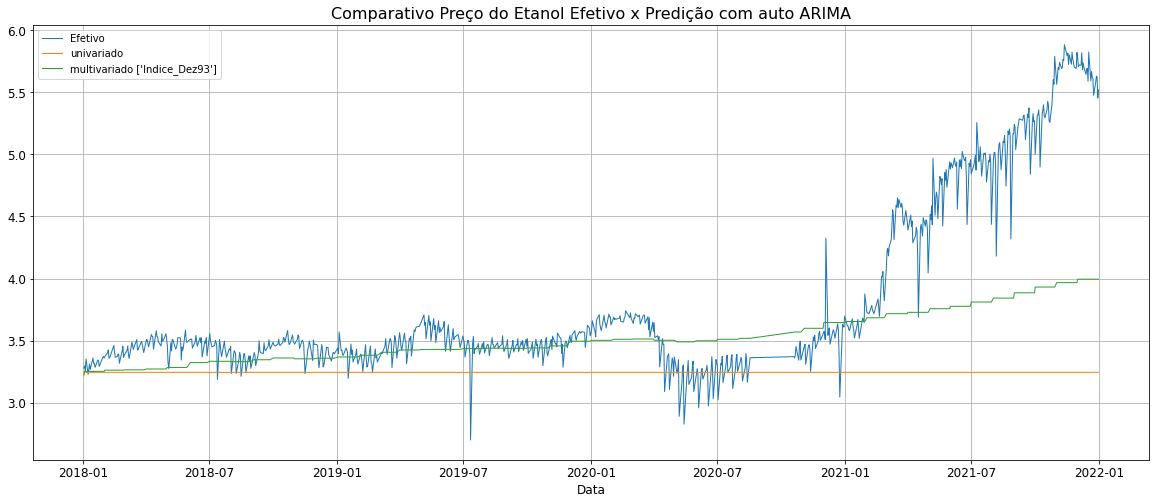

In [33]:
plt.figure(figsize = (20,8))
plt.title('Comparativo Preço do Etanol Efetivo x Predição com auto ARIMA')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.plot(previsao_mul, label = f"multivariado {df_modelos_etanol['Variáveis'][index_mul]}")
plt.grid(True, axis='both')
plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()


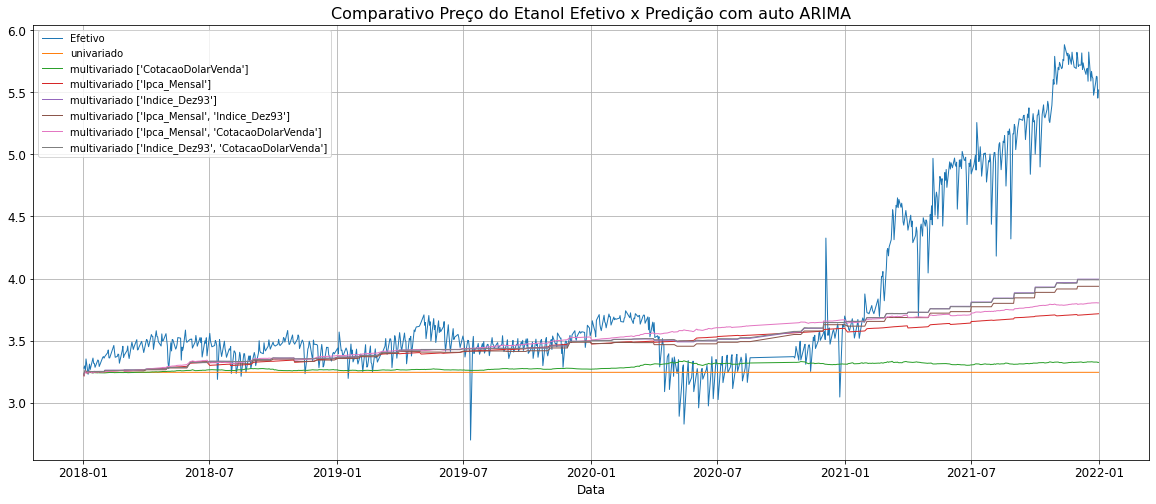

In [34]:
plt.figure(figsize = (20,8))
plt.title('Comparativo Preço do Etanol Efetivo x Predição com auto ARIMA')
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'][-829:], label = "Efetivo")
plt.plot(previsao_uni, label = "univariado")
plt.grid(True, axis='both')

for i in range (1,7):
    plt.plot(df_modelos_etanol.loc[i]['Previsões'], label = f"multivariado {df_modelos_etanol['Variáveis'][i]}")

plt.legend(loc = 'upper left')
plt.xlabel('Data')
plt.show()

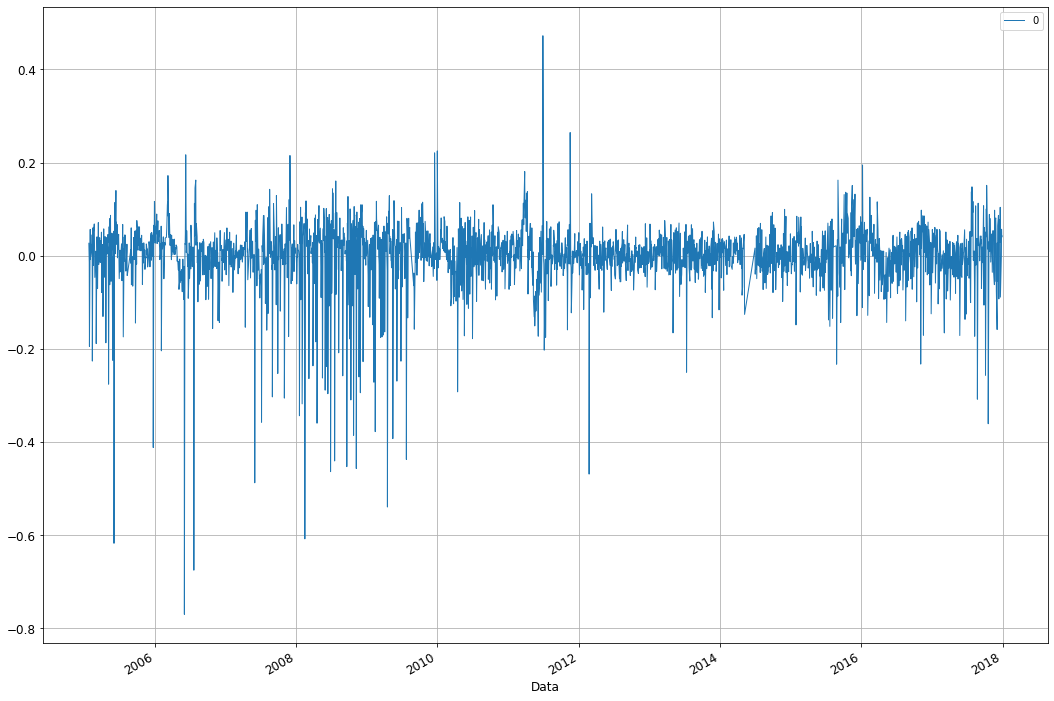

In [35]:
#Plotagem dos resíduos(diferença entre)
residuals = pd.DataFrame(model_mul.resid())[12:]
residuals.plot()
plt.grid(True, axis='both')
plt.show()

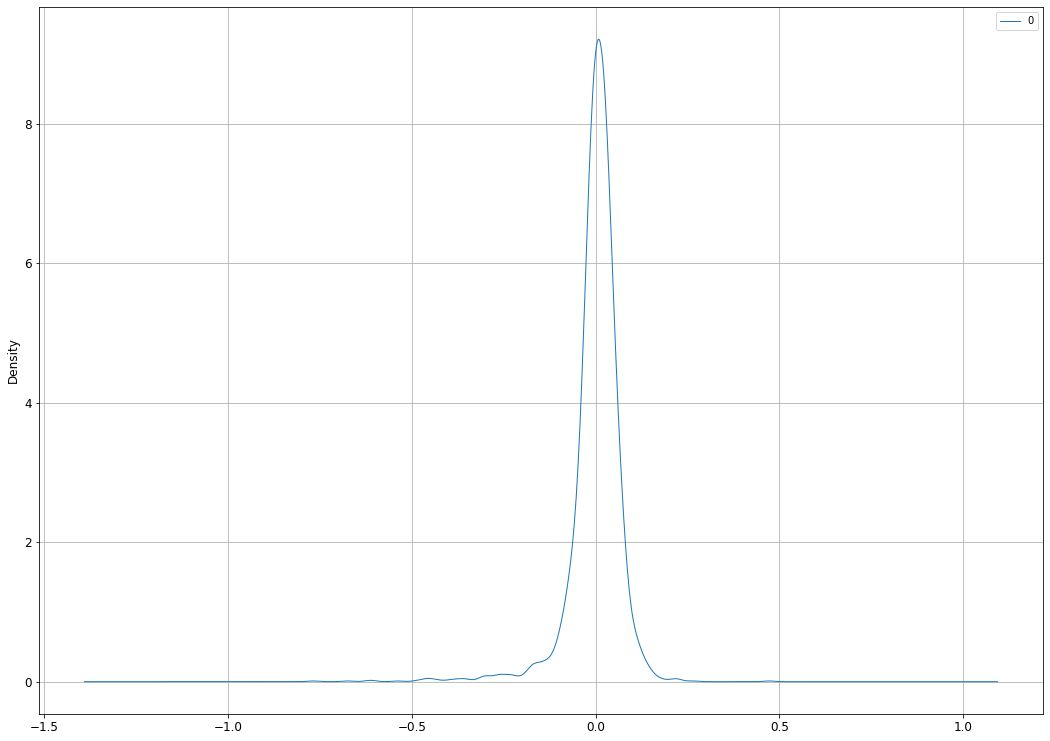

                 0
count  2670.000000
mean     -0.000075
std       0.071313
min      -0.769942
25%      -0.020320
50%       0.007009
75%       0.033850
max       0.472314


In [36]:
#Plotagem da densidade dos resíduos(erros residuais)
residuals.plot(kind='kde')
plt.grid(True, axis='both')
plt.show()
print(residuals.describe())